In [1]:
import numpy as np
import os
import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree, metrics
from sklearn.externals.six import StringIO
from IPython.display import Image
import pydotplus
import warnings

%matplotlib inline

C:\Users\pam\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
warnings.filterwarnings('ignore')

In [3]:
path = os.getcwd()

In [4]:
df = pd.read_csv(path+'\\data\\listings.csv.gz', compression='gzip')

In [5]:
df.head()

id                        listing_url       scrape_id last_scraped  \
0  2265  https://www.airbnb.com/rooms/2265  20200719161413   2020-07-20   
1  5245  https://www.airbnb.com/rooms/5245  20200719161413   2020-07-19   
2  5456  https://www.airbnb.com/rooms/5456  20200719161413   2020-07-20   
3  5636  https://www.airbnb.com/rooms/5636  20200719161413   2020-07-19   
4  5769  https://www.airbnb.com/rooms/5769  20200719161413   2020-07-20   

                                                name  \
0   Zen-East in the Heart of Austin (monthly rental)   
1  Eco friendly, Colorful, Clean, Cozy monthly share   
2          Walk to 6th, Rainey St and Convention Ctr   
3  SOCO, BARTON SPRGS, Bouldin, PRIVATE Guest Cot...   
4                                     NW Austin Room   

                                             summary  \
0  Zen East is situated in a vibrant & diverse mu...   
1  Situated in a vibrant & diverse multicultural ...   
2  Great central  location for walking to Convent...   
3  MONTHLY Short Term  Located in the awesome Bou...   
4                                                NaN   

                                               space  \
0  This colorful and clean 1923 house was complet...   
1  This green, colorful, clean and cozy house was...   
2  Cute Private Studio apartment located in Willo...   
3  Hip area in old South Central Austin (SoCo)Jus...   
4  Looking for a comfortable inexpensive room to ...   

                                         description experiences_offered  \
0  Zen East is situated in a vibrant & diverse mu...                none   
1  Situated in a vibrant & diverse multicultural ...                none   
2  Great central  location for walking to Convent...                none   
3  MONTHLY Short Term  Located in the awesome Bou...                none   
4  Looking for a comfortable inexpensive room to ...                none   

                               neighborhood_overview  ... instant_bookable  \
0                                                NaN  ...                f   
1                                                NaN  ...                f   
2  My neighborhood is ideally located if you want...  ...                f   
3  This area is one of the top areas in Austin to...  ...                t   
4  Quiet neighborhood with lots of trees and good...  ...                f   

  is_business_travel_ready          cancellation_policy  \
0                        f  strict_14_with_grace_period   
1                        f  strict_14_with_grace_period   
2                        f  strict_14_with_grace_period   
3                        f  strict_14_with_grace_period   
4                        f                     moderate   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   
2                             f                                t   
3                             f                                f   
4                             t                                t   

   calculated_host_listings_count  \
0                               3   
1                               3   
2                               1   
3                               2   
4                               1   

   calculated_host_listings_count_entire_homes  \
0                                            2   
1                                            2   
2                                            1   
3                                            2   
4                                            0   

  calculated_host_listings_count_private_rooms  \
0                                            1   
1                                            1   
2                                            0   
3                                            0   
4                                            1   

   calculated_host_listings_

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Columns: 106 entries, id to reviews_per_month
dtypes: float64(23), int64(22), object(61)
memory usage: 8.3+ MB


In [7]:
df.describe()

id     scrape_id  thumbnail_url  medium_url  xl_picture_url  \
count  1.032100e+04  1.032100e+04            0.0         0.0             0.0   
mean   2.366575e+07  2.020072e+13            NaN         NaN             NaN   
std    1.357304e+07  2.882952e+00            NaN         NaN             NaN   
min    2.265000e+03  2.020072e+13            NaN         NaN             NaN   
25%    1.167817e+07  2.020072e+13            NaN         NaN             NaN   
50%    2.342069e+07  2.020072e+13            NaN         NaN             NaN   
75%    3.666966e+07  2.020072e+13            NaN         NaN             NaN   
max    4.429640e+07  2.020072e+13            NaN         NaN             NaN   

            host_id  host_listings_count  host_total_listings_count  \
count  1.032100e+04         10319.000000               10319.000000   
mean   7.748387e+07            52.749588                  52.749588   
std    8.949796e+07           244.443000                 244.443000   
min    2.300000e+01             0.000000                   0.000000   
25%    9.089700e+06             1.000000                   1.000000   
50%    3.850581e+07             1.000000                   1.000000   
75%    1.183997e+08             4.000000                   4.000000   
max    3.569320e+08          2143.000000                2143.000000   

       neighbourhood_cleansed  neighbourhood_group_cleansed  ...  \
count            10321.000000                           0.0  ...   
mean             78722.519814                           NaN  ...   
std                 20.704464                           NaN  ...   
min              78701.000000                           NaN  ...   
25%              78704.000000                           NaN  ...   
50%              78721.000000                           NaN  ...   
75%              78744.000000                           NaN  ...   
max              78759.000000                           NaN  ...   

       review_scores_cleanliness  review_scores_checkin  \
count                7854.000000            7853.000000   
mean                    9.598549               9.841717   
std                     0.861860               0.614630   
min                     2.000000               2.000000   
25%                     9.000000              10.000000   
50%                    10.000000              10.000000   
75%                    10.000000              10.000000   
max                    10.000000              10.000000   

       review_scores_communication  review_scores_location  \
count                  7853.000000              7848.00000   
mean                      9.839170                 9.78262   
std                       0.623438                 0.62131   
min                       2.000000                 2.00000   
25%                      10.000000                10.00000   
50%                      10.000000                10.00000   
75%                      10.000000                10.00000   
max                      10.000000                10.00000   

       review_scores_value  calculated_host_listings_count  \
count          7849.000000                    10321.000000   
mean              9.598293                        8.189807   
std               0.803631                       23.676828   
min               2.000000                        1.000000   
25%               9.000000                        1.000000   
50%              10.000000                        1.000000   
75%              10.000000                        3.000000   
max              10.000000                      166.000000   

       calculated_host_listings_count_entire_homes  \
count                                 10321.000000   
mean                                      7.046604   
std                                      22.950204   
min                                       0.000000   
25%                                       1.000000   
50%                                       1.000000   
75%            

In [8]:
for i in df.dtypes:
    print(i)

int64
object
int64
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object
float64
int64
object
object
object
object
object
object
object
object
object
object
object
object
float64
float64
object
object
object
object
object
int64
float64
object
object
float64
object
object
object
object
float64
float64
object
object
object
int64
float64
float64
float64
object
object
float64
object
object
object
object
object
int64
object
int64
int64
int64
int64
int64
int64
float64
float64
object
object
int64
int64
int64
int64
object
int64
int64
object
object
float64
float64
float64
float64
float64
float64
float64
object
object
object
object
object
object
object
object
int64
int64
int64
int64
float64


In [9]:
for i in df.columns.unique():
    print(i)

id
listing_url
scrape_id
last_scraped
name
summary
space
description
experiences_offered
neighborhood_overview
notes
transit
access
interaction
house_rules
thumbnail_url
medium_url
picture_url
xl_picture_url
host_id
host_url
host_name
host_since
host_location
host_about
host_response_time
host_response_rate
host_acceptance_rate
host_is_superhost
host_thumbnail_url
host_picture_url
host_neighbourhood
host_listings_count
host_total_listings_count
host_verifications
host_has_profile_pic
host_identity_verified
street
neighbourhood
neighbourhood_cleansed
neighbourhood_group_cleansed
city
state
zipcode
market
smart_location
country_code
country
latitude
longitude
is_location_exact
property_type
room_type
accommodates
bathrooms
bedrooms
beds
bed_type
amenities
square_feet
price
weekly_price
monthly_price
security_deposit
cleaning_fee
guests_included
extra_people
minimum_nights
maximum_nights
minimum_minimum_nights
maximum_minimum_nights
minimum_maximum_nights
maximum_maximum_nights
minimum_ni

In [10]:
df = df[['id', 'neighbourhood', 'neighbourhood_cleansed', 'neighbourhood_group_cleansed',
        'city', 'zipcode', 'market', 'smart_location', 'latitude', 'longitude', 
         'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price',
        'weekly_price', 'monthly_price']]

In [11]:
df.head()

id      neighbourhood  neighbourhood_cleansed  \
0  2265      East Downtown                   78702   
1  5245      East Downtown                   78702   
2  5456      East Downtown                   78702   
3  5636      Bouldin Creek                   78704   
4  5769  SW Williamson Co.                   78729   

   neighbourhood_group_cleansed    city  zipcode  market smart_location  \
0                           NaN  Austin  78702.0  Austin     Austin, TX   
1                           NaN  Austin  78702.0  Austin     Austin, TX   
2                           NaN  Austin  78702.0  Austin     Austin, TX   
3                           NaN  Austin  78704.0  Austin     Austin, TX   
4                           NaN  Austin  78729.0  Austin     Austin, TX   

   latitude  longitude property_type        room_type  bathrooms  bedrooms  \
0  30.27750  -97.71398         House  Entire home/apt        2.0       2.0   
1  30.27577  -97.71379         House     Private room        1.0       1.0   
2  30.26112  -97.73448    Guesthouse  Entire home/apt        1.0       1.0   
3  30.24630  -97.76361     Apartment  Entire home/apt        1.0       1.0   
4  30.45697  -97.78422         House     Private room        1.0       1.0   

     price weekly_price monthly_price  
0  $225.00          NaN           NaN  
1  $100.00          NaN           NaN  
2   $95.00          NaN           NaN  
3   $55.00      $599.00     $1,350.00  
4   $40.00      $160.00           NaN

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            10321 non-null  int64  
 1   neighbourhood                 9536 non-null   object 
 2   neighbourhood_cleansed        10321 non-null  int64  
 3   neighbourhood_group_cleansed  0 non-null      float64
 4   city                          10319 non-null  object 
 5   zipcode                       10246 non-null  float64
 6   market                        10313 non-null  object 
 7   smart_location                10321 non-null  object 
 8   latitude                      10321 non-null  float64
 9   longitude                     10321 non-null  float64
 10  property_type                 10321 non-null  object 
 11  room_type                     10321 non-null  object 
 12  bathrooms                     10307 non-null  float64
 13  b

In [13]:
# Further removing unneeded features
df = df[['id', 'neighbourhood', 'neighbourhood_cleansed', 'latitude', 'longitude', 'property_type', 
        'room_type', 'bathrooms', 'bedrooms', 'price']]

In [14]:
df.head()

id      neighbourhood  neighbourhood_cleansed  latitude  longitude  \
0  2265      East Downtown                   78702  30.27750  -97.71398   
1  5245      East Downtown                   78702  30.27577  -97.71379   
2  5456      East Downtown                   78702  30.26112  -97.73448   
3  5636      Bouldin Creek                   78704  30.24630  -97.76361   
4  5769  SW Williamson Co.                   78729  30.45697  -97.78422   

  property_type        room_type  bathrooms  bedrooms    price  
0         House  Entire home/apt        2.0       2.0  $225.00  
1         House     Private room        1.0       1.0  $100.00  
2    Guesthouse  Entire home/apt        1.0       1.0   $95.00  
3     Apartment  Entire home/apt        1.0       1.0   $55.00  
4         House     Private room        1.0       1.0   $40.00

In [15]:
df.columns = ['id', 'neighborhood', 'zipcode', 'latitude', 'longitude',
             'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price']

In [16]:
df.dtypes

id                 int64
neighborhood      object
zipcode            int64
latitude         float64
longitude        float64
property_type     object
room_type         object
bathrooms        float64
bedrooms         float64
price             object
dtype: object

In [17]:
df['zipcode'].unique()

array([78702, 78704, 78729, 78741, 78748, 78705, 78759, 78703, 78757,
       78749, 78727, 78731, 78758, 78744, 78751, 78722, 78725, 78701,
       78723, 78752, 78736, 78732, 78746, 78745, 78728, 78730, 78724,
       78753, 78756, 78754, 78735, 78721, 78734, 78739, 78733, 78737,
       78738, 78726, 78717, 78750, 78712, 78742, 78747, 78719],
      dtype=int64)

Since neighborhood_cleansed is an int and the original zipcode column is a float, I changed the name of neighborhood_cleansed -> zipcode. Converting the zipcode column isn't needed now.

In [18]:
#df['zipcode'] = df['zipcode'].fillna(df['zipcode'].mean())
#df['zipcode'] = df['zipcode'].astype(int)

In [18]:
df['property_type'].unique()

array(['House', 'Guesthouse', 'Apartment', 'Guest suite', 'Condominium',
       'Townhouse', 'Bungalow', 'Loft', 'Other', 'Cabin',
       'Bed and breakfast', 'Campsite', 'Tent', 'Villa', 'Camper/RV',
       'Cottage', 'Tiny house', 'Boutique hotel', 'Yurt', 'Bus',
       'Serviced apartment', 'Tipi', 'Treehouse', 'Barn', 'Boat',
       'Hostel', 'Chalet', 'Houseboat', 'Resort', 'Aparthotel',
       'Farm stay', 'Hotel', 'Dome house', 'Earth house'], dtype=object)

In [19]:
df['property_type'] = df['property_type'].astype('category')

In [20]:
df['room_type'] = df['room_type'].astype('category')

In [21]:
df.dtypes

id                  int64
neighborhood       object
zipcode             int64
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price              object
dtype: object

In [22]:
for i in df['price'].unique():
    print(i)

$225.00
$100.00
$95.00
$55.00
$40.00
$99.00
$139.00
$300.00
$550.00
$220.00
$150.00
$52.00
$35.00
$59.00
$350.00
$105.00
$32.00
$130.00
$89.00
$145.00
$159.00
$110.00
$125.00
$470.00
$85.00
$49.00
$230.00
$109.00
$90.00
$115.00
$170.00
$821.00
$400.00
$68.00
$195.00
$245.00
$750.00
$404.00
$50.00
$69.00
$80.00
$119.00
$199.00
$508.00
$47.00
$45.00
$329.00
$70.00
$78.00
$60.00
$260.00
$295.00
$136.00
$129.00
$373.00
$499.00
$79.00
$800.00
$346.00
$270.00
$124.00
$184.00
$250.00
$185.00
$500.00
$450.00
$81.00
$175.00
$399.00
$154.00
$210.00
$67.00
$65.00
$600.00
$650.00
$625.00
$240.00
$149.00
$749.00
$495.00
$75.00
$111.00
$1,000.00
$200.00
$120.00
$34.00
$370.00
$299.00
$155.00
$430.00
$58.00
$675.00
$908.00
$248.00
$141.00
$1,050.00
$325.00
$135.00
$795.00
$194.00
$101.00
$2,150.00
$15.00
$595.00
$575.00
$1,200.00
$695.00
$82.00
$102.00
$599.00
$255.00
$415.00
$165.00
$899.00
$211.00
$132.00
$249.00
$700.00
$1,499.00
$2,000.00
$275.00
$51.00
$545.00
$144.00
$1,250.00
$228.00
$1,633.00

In [23]:
df['price'] = df['price'].str.replace('$', '')
df['price'] = df['price'].str.replace(',', '')

In [24]:
df['price'] = df['price'].astype(float)

In [25]:
df.dtypes

id                  int64
neighborhood       object
zipcode             int64
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price             float64
dtype: object

All data types are what they should be.

In [26]:
df.isnull().sum(axis=0)

id                 0
neighborhood     785
zipcode            0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms         14
bedrooms          11
price              0
dtype: int64

In [27]:
df['bathrooms'] = df['bathrooms'].fillna(df['bathrooms'].mean())
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

In [28]:
df.isnull().sum(axis=0)

id                 0
neighborhood     785
zipcode            0
latitude           0
longitude          0
property_type      0
room_type          0
bathrooms          0
bedrooms           0
price              0
dtype: int64

No missing values in variables of interest.

---

## Exploratory Data Analysis

Text(0.5, 1.0, 'Histogram of Listing Prices')

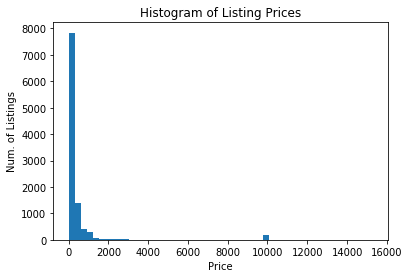

In [29]:
plt.hist(df['price'], bins=50)
plt.xlabel('Price')
plt.ylabel('Num. of Listings')
plt.title('Histogram of Listing Prices')

Text(0.5, 1.0, 'Boxplot of Price per Room Type')

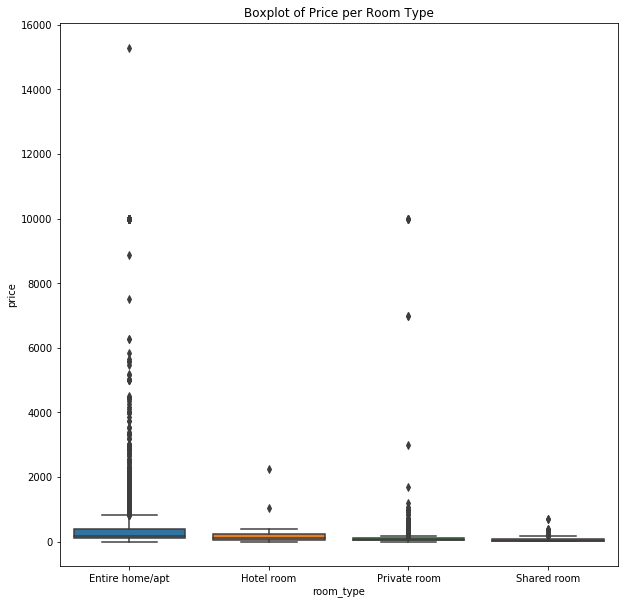

In [30]:
fig_dims = (10, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.boxplot(x='room_type', y='price', data=df, ax=ax)
plt.title('Boxplot of Price per Room Type')

In [31]:
rooms = list(df['room_type'].unique())
colors = ['blue', 'red', 'yellow', 'green']

room_colors = dict(zip(rooms, colors))
print(room_colors)

{'Entire home/apt': 'blue', 'Private room': 'red', 'Hotel room': 'yellow', 'Shared room': 'green'}


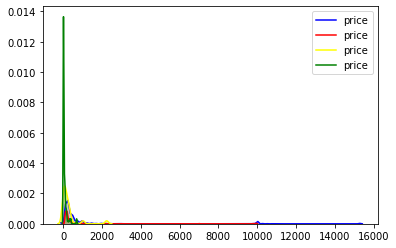

In [32]:
for i in df['room_type'].unique():
    temp = df[df['room_type'] == i]
    sns.kdeplot(temp['price'], shade=True, color=room_colors[i])

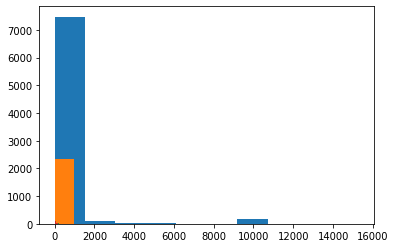

In [33]:
# work on this
# create subplots for different room types
for i in df['room_type'].unique():
    temp = df[df['room_type'] == i]
    plt.hist(temp['price'])

## Feature Engineering:

This project assumes that the price of an AirBNB Listing is related to its location to points of interest in Austin, TX. From examining the Wikipedia Page for Austin, various points of interest were put into a CSV file and then the Google Geocoder API was used to get the exact coordinates of the points of interest.

The code for getting the coordinates can be see at: <insert link>

In [34]:
pts_int = pd.read_csv('address_coords.csv')
pts_int = pts_int[['Name', 'Full_Address', 'lat', 'long']]

In [35]:
# Had a weird index col show up after import, hence the quick change
pts_int

Name                                   Full_Address  \
0                     utexas  110 Inner Campus Drive, Austin, TX 78705, USA   
1   austin_convention_center   500 E Cesar Chavez St, Austin, TX 78701, USA   
2                zilker_park  2100 Barton Springs Rd, Austin, TX 78704, USA   
3           alamo_drafthouse       1120 S Lamar Blvd, Austin, TX 78704, USA   
4          paramount_theater        713 Congress Ave, Austin, TX 78701, USA   
5           tx_state_capitol       1100 Congress Ave, Austin, TX 78701, USA   
6                 lbj_museum       2313 Red River St, Austin, TX 78705, USA   
7        barton_springs_pool  2131 William Barton Dr, Austin, TX 78746, USA   
8                    airport  3600 Presidential Blvd, Austin, TX 78719, USA   
9     bat_observation_center      305 S Congress Ave, Austin, TX 78704, USA   
10             rainey_street            82 Rainey St, Austin, TX 78701, USA   
11              franklin_bbq           900 E 11th St, Austin, TX 78702, USA   
12               east_6th_st            407 E 6th St, Austin, TX 78701, USA   
13               west_6th_st            613 W 6th St, Austin, TX 78701, USA   
14           far_east_6th_st           1502 E 6th St, Austin, TX 78702, USA   

          lat       long  
0   30.286106 -97.739363  
1   30.264265 -97.739294  
2   30.266070 -97.769135  
3   30.256198 -97.763572  
4   30.269352 -97.741882  
5   30.274703 -97.740345  
6   30.285793 -97.729128  
7   30.264093 -97.771277  
8   30.204909 -97.667131  
9   30.258673 -97.744471  
10  30.259373 -97.738846  
11  30.270119 -97.731273  
12  30.266717 -97.739103  
13  30.269702 -97.749203  
14  30.263576 -97.727275

In [36]:
df.head()

id       neighborhood  zipcode  latitude  longitude property_type  \
0  2265      East Downtown    78702  30.27750  -97.71398         House   
1  5245      East Downtown    78702  30.27577  -97.71379         House   
2  5456      East Downtown    78702  30.26112  -97.73448    Guesthouse   
3  5636      Bouldin Creek    78704  30.24630  -97.76361     Apartment   
4  5769  SW Williamson Co.    78729  30.45697  -97.78422         House   

         room_type  bathrooms  bedrooms  price  
0  Entire home/apt        2.0       2.0  225.0  
1     Private room        1.0       1.0  100.0  
2  Entire home/apt        1.0       1.0   95.0  
3  Entire home/apt        1.0       1.0   55.0  
4     Private room        1.0       1.0   40.0

In [39]:
'''
df1['key'] = 0
df2['key'] = 0

df_cartesian = df1.merge(df2, how='outer')
df_cartesian = df_cartesian.drop(columns=['key'])
'''

"\ndf1['key'] = 0\ndf2['key'] = 0\n\ndf_cartesian = df1.merge(df2, how='outer')\ndf_cartesian = df_cartesian.drop(columns=['key'])\n"

In [37]:
df['key'] = 0
pts_int['key'] = 0

In [38]:
df_cartesian = df.merge(pts_int, how = 'outer')
df_cartesian = df_cartesian.drop(columns = ['key'])

In [39]:
df_cartesian

id   neighborhood  zipcode   latitude  longitude property_type  \
0           2265  East Downtown    78702  30.277500 -97.713980         House   
1           2265  East Downtown    78702  30.277500 -97.713980         House   
2           2265  East Downtown    78702  30.277500 -97.713980         House   
3           2265  East Downtown    78702  30.277500 -97.713980         House   
4           2265  East Downtown    78702  30.277500 -97.713980         House   
...          ...            ...      ...        ...        ...           ...   
154810  44296405     North Loop    78751  30.320312 -97.718714      Bungalow   
154811  44296405     North Loop    78751  30.320312 -97.718714      Bungalow   
154812  44296405     North Loop    78751  30.320312 -97.718714      Bungalow   
154813  44296405     North Loop    78751  30.320312 -97.718714      Bungalow   
154814  44296405     North Loop    78751  30.320312 -97.718714      Bungalow   

              room_type  bathrooms  bedrooms  price                      Name  \
0       Entire home/apt        2.0       2.0  225.0                    utexas   
1       Entire home/apt        2.0       2.0  225.0  austin_convention_center   
2       Entire home/apt        2.0       2.0  225.0               zilker_park   
3       Entire home/apt        2.0       2.0  225.0          alamo_drafthouse   
4       Entire home/apt        2.0       2.0  225.0         paramount_theater   
...                 ...        ...       ...    ...                       ...   
154810     Private room        1.0       1.0   44.0             rainey_street   
154811     Private room        1.0       1.0   44.0              franklin_bbq   
154812     Private room        1.0       1.0   44.0               east_6th_st   
154813     Private room        1.0       1.0   44.0               west_6th_st   
154814     Private room        1.0       1.0   44.0           far_east_6th_st   

                                         Full_Address        lat       long  
0       110 Inner Campus Drive, Austin, TX 78705, USA  30.286106 -97.739363  
1        500 E Cesar Chavez St, Austin, TX 78701, USA  30.264265 -97.739294  
2       2100 Barton Springs Rd, Austin, TX 78704, USA  30.266070 -97.769135  
3            1120 S Lamar Blvd, Austin, TX 78704, USA  30.256198 -97.763572  
4             713 Congress Ave, Austin, TX 78701, USA  30.269352 -97.741882  
...                                               ...        ...        ...  
154810            82 Rainey St, Austin, TX 78701, USA  30.259373 -97.738846  
154811           900 E 11th St, Austin, TX 78702, USA  30.270119 -97.731273  
154812            407 E 6th St, Austin, TX 78701, USA  30.266717 -97.739103  
154813            613 W 6th St, Austin, TX 78701, USA  30.269702 -97.749203  
154814           1502 E 6th St, Austin, TX 78702, USA  30.263576 -97.727275  

[154815 rows x 14 columns]

In [40]:
df_cartesian['dist_lat'] = abs(round(df_cartesian['latitude'] - df_cartesian['lat'], 2))
df_cartesian['dist_long'] = abs(round(df_cartesian['longitude'] - df_cartesian['long'], 2))

In [41]:
df_cartesian.head()

id   neighborhood  zipcode  latitude  longitude property_type  \
0  2265  East Downtown    78702   30.2775  -97.71398         House   
1  2265  East Downtown    78702   30.2775  -97.71398         House   
2  2265  East Downtown    78702   30.2775  -97.71398         House   
3  2265  East Downtown    78702   30.2775  -97.71398         House   
4  2265  East Downtown    78702   30.2775  -97.71398         House   

         room_type  bathrooms  bedrooms  price                      Name  \
0  Entire home/apt        2.0       2.0  225.0                    utexas   
1  Entire home/apt        2.0       2.0  225.0  austin_convention_center   
2  Entire home/apt        2.0       2.0  225.0               zilker_park   
3  Entire home/apt        2.0       2.0  225.0          alamo_drafthouse   
4  Entire home/apt        2.0       2.0  225.0         paramount_theater   

                                    Full_Address        lat       long  \
0  110 Inner Campus Drive, Austin, TX 78705, USA  30.286106 -97.739363   
1   500 E Cesar Chavez St, Austin, TX 78701, USA  30.264265 -97.739294   
2  2100 Barton Springs Rd, Austin, TX 78704, USA  30.266070 -97.769135   
3       1120 S Lamar Blvd, Austin, TX 78704, USA  30.256198 -97.763572   
4        713 Congress Ave, Austin, TX 78701, USA  30.269352 -97.741882   

   dist_lat  dist_long  
0      0.01       0.03  
1      0.01       0.03  
2      0.01       0.06  
3      0.02       0.05  
4      0.01       0.03

In [42]:
df_cartesian['euclid_dist'] = np.sqrt(((df_cartesian['dist_lat'])**2) + ((df_cartesian['dist_long'])**2))

In [44]:
df_cartesian.head()

id   neighborhood  zipcode  latitude  longitude property_type  \
0  2265  East Downtown    78702   30.2775  -97.71398         House   
1  2265  East Downtown    78702   30.2775  -97.71398         House   
2  2265  East Downtown    78702   30.2775  -97.71398         House   
3  2265  East Downtown    78702   30.2775  -97.71398         House   
4  2265  East Downtown    78702   30.2775  -97.71398         House   

         room_type  bathrooms  bedrooms  price                      Name  \
0  Entire home/apt        2.0       2.0  225.0                    utexas   
1  Entire home/apt        2.0       2.0  225.0  austin_convention_center   
2  Entire home/apt        2.0       2.0  225.0               zilker_park   
3  Entire home/apt        2.0       2.0  225.0          alamo_drafthouse   
4  Entire home/apt        2.0       2.0  225.0         paramount_theater   

                                    Full_Address        lat       long  \
0  110 Inner Campus Drive, Austin, TX 78705, USA  30.286106 -97.739363   
1   500 E Cesar Chavez St, Austin, TX 78701, USA  30.264265 -97.739294   
2  2100 Barton Springs Rd, Austin, TX 78704, USA  30.266070 -97.769135   
3       1120 S Lamar Blvd, Austin, TX 78704, USA  30.256198 -97.763572   
4        713 Congress Ave, Austin, TX 78701, USA  30.269352 -97.741882   

   dist_lat  dist_long  euclid_dist  
0      0.01       0.03     0.031623  
1      0.01       0.03     0.031623  
2      0.01       0.06     0.060828  
3      0.02       0.05     0.053852  
4      0.01       0.03     0.031623

In [71]:
distances = df_cartesian[['id', 'Name', 'euclid_dist']]

In [72]:
distances.head()

id                      Name  euclid_dist
0  2265                    utexas     0.031623
1  2265  austin_convention_center     0.031623
2  2265               zilker_park     0.060828
3  2265          alamo_drafthouse     0.053852
4  2265         paramount_theater     0.031623

In [76]:
distances = distances.pivot(index='id', columns='Name', values='euclid_dist')

In [77]:
distances.head()

Name   airport  alamo_drafthouse  austin_convention_center  \
id                                                           
2265  0.086023          0.053852                  0.031623   
5245  0.086023          0.053852                  0.031623   
5456  0.092195          0.030000                  0.000000   
5636  0.107703          0.010000                  0.028284   
5769  0.277308          0.200998                  0.194165   

Name  barton_springs_pool  bat_observation_center  east_6th_st  \
id                                                               
2265             0.060828                0.036056     0.031623   
5245             0.060828                0.036056     0.031623   
5456             0.040000                0.010000     0.010000   
5636             0.022361                0.022361     0.028284   
5769             0.190263                0.203961     0.196469   

Name  far_east_6th_st  franklin_bbq  lbj_museum  paramount_theater  \
id                                                                   
2265         0.014142      0.022361    0.022361           0.031623   
5245         0.014142      0.022361    0.022361           0.031623   
5456         0.010000      0.010000    0.022361           0.014142   
5636         0.044721      0.036056    0.050000           0.028284   
5769         0.199249      0.196469    0.180278           0.194165   

Name  rainey_street  tx_state_capitol    utexas  west_6th_st  zilker_park  
id                                                                         
2265       0.028284          0.030000  0.031623     0.041231     0.060828  
5245       0.036056          0.030000  0.031623     0.041231     0.060828  
5456       0.000000          0.014142  0.020000     0.014142     0.030000  
5636       0.022361          0.036056  0.044721     0.022361     0.022361  
5769       0.206155          0.184391  0.174642     0.194165     0.191050

In [79]:
distance_col_names = distance.columns
print(distance_col_names)

Index(['airport', 'alamo_drafthouse', 'austin_convention_center',
       'barton_springs_pool', 'bat_observation_center', 'east_6th_st',
       'far_east_6th_st', 'franklin_bbq', 'lbj_museum', 'paramount_theater',
       'rainey_street', 'tx_state_capitol', 'utexas', 'west_6th_st',
       'zilker_park'],
      dtype='object', name='Name')


In [80]:
new_col_names = []
for i in distance_col_names:
    new_col_names.append(str(i)+'_dist')
    
print(new_col_names)    

['airport_dist', 'alamo_drafthouse_dist', 'austin_convention_center_dist', 'barton_springs_pool_dist', 'bat_observation_center_dist', 'east_6th_st_dist', 'far_east_6th_st_dist', 'franklin_bbq_dist', 'lbj_museum_dist', 'paramount_theater_dist', 'rainey_street_dist', 'tx_state_capitol_dist', 'utexas_dist', 'west_6th_st_dist', 'zilker_park_dist']


In [81]:
distance.columns = new_col_names
distance.head()

airport_dist  alamo_drafthouse_dist  austin_convention_center_dist  \
id                                                                         
2265      0.086023               0.053852                       0.031623   
5245      0.086023               0.053852                       0.031623   
5456      0.092195               0.030000                       0.000000   
5636      0.107703               0.010000                       0.028284   
5769      0.277308               0.200998                       0.194165   

      barton_springs_pool_dist  bat_observation_center_dist  east_6th_st_dist  \
id                                                                              
2265                  0.060828                     0.036056          0.031623   
5245                  0.060828                     0.036056          0.031623   
5456                  0.040000                     0.010000          0.010000   
5636                  0.022361                     0.022361          0.028284   
5769                  0.190263                     0.203961          0.196469   

      far_east_6th_st_dist  franklin_bbq_dist  lbj_museum_dist  \
id                                                               
2265              0.014142           0.022361         0.022361   
5245              0.014142           0.022361         0.022361   
5456              0.010000           0.010000         0.022361   
5636              0.044721           0.036056         0.050000   
5769              0.199249           0.196469         0.180278   

      paramount_theater_dist  rainey_street_dist  tx_state_capitol_dist  \
id                                                                        
2265                0.031623            0.028284               0.030000   
5245                0.031623            0.036056               0.030000   
5456                0.014142            0.000000               0.014142   
5636                0.028284            0.022361               0.036056   
5769                0.194165            0.206155               0.184391   

      utexas_dist  west_6th_st_dist  zilker_park_dist  
id                                                     
2265     0.031623          0.041231          0.060828  
5245     0.031623          0.041231          0.060828  
5456     0.020000          0.014142          0.030000  
5636     0.044721          0.022361          0.022361  
5769     0.174642          0.194165          0.191050

In [ ]:
df_merged = 

Want 15 features per listing, coll

pd.melt

## Map of AirBNB Listing Locations

The motivation for mapping the location of the AirBNB listings is the assumption that the location is predictive of a listing's price. A listing closer to points of interest would be expected to be more expensive than a listing further away assuming the listings have similar amenities.

In [42]:
import folium
from folium import plugins
import json

In [43]:
map_df = df[['latitude', 'longitude', 'room_type']]

In [44]:
map_df.head()

latitude  longitude        room_type
0  30.27750  -97.71398  Entire home/apt
1  30.27577  -97.71379     Private room
2  30.26112  -97.73448  Entire home/apt
3  30.24630  -97.76361  Entire home/apt
4  30.45697  -97.78422     Private room

In [45]:
with open(path+'\\data\\atxNeighborhoods.geojson') as f:
    atxArea = json.load(f)

In [46]:
lat, lon = np.mean(map_df.latitude), np.mean(map_df.longitude)

In [47]:
austinMap = folium.Map(location = [lat, lon],
                      titles='Stamen Toner',
                      zoom_start=11.5)

In [48]:
folium.GeoJson(atxArea).add_to(austinMap)

In [49]:
for i in map_df['room_type'].unique():
    temp = map_df[map_df['room_type'] == i]
    for j, row in temp.iterrows():
        folium.CircleMarker((row.latitude, row.longitude),
                           radius = 2,
                           weight = 2,
                           color = room_colors[i],
                           fill_color = room_colors[i],
                           fill_opacity = 0.2).add_to(austinMap)

Adding points of interest to map.

In [50]:
for i in pts_int['Name'].unique():
    temp = pts_int[pts_int['Name'] == i]
    for j, row in temp.iterrows():
        folium.CircleMarker((row.lat, row.long),
                           radius = 3.5,
                           weight = 3.5,
                           color = 'orange',
                           fill_color = 'orange',
                           fill_opacity = 0.5).add_to(austinMap)

In [51]:
austinMap.save('atxMap.html')

In [52]:
austinMap

In [53]:
print(room_colors)

{'Entire home/apt': 'blue', 'Private room': 'red', 'Hotel room': 'yellow', 'Shared room': 'green'}


---

## Data Training and Pre-Processing

In [57]:
df = df_cartesian

In [58]:
df.columns

Index(['id', 'neighborhood', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price', 'Name',
       'Full_Address', 'lat', 'long', 'dist_lat', 'dist_long'],
      dtype='object')

In [59]:
from sklearn.model_selection import train_test_split

In [56]:
X = df[['bathrooms', 'bedrooms']]

y = df[['price']]

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [58]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 2) (7740, 1)
(2581, 2) (2581, 1)


## Model 1: Linear Regression

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
linReg = LinearRegression()

In [61]:
linReg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [62]:
print(linReg.score(X_train, y_train))

0.01565650752759906


In [63]:
y_pred = linReg.predict(X_test)

Text(0.5, 1.0, 'Linear Regression: Test vs. Prediction')

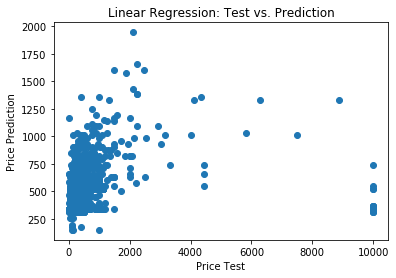

In [64]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price Test')
plt.ylabel('Price Prediction')
plt.title('Linear Regression: Test vs. Prediction')

Linear model performed poorly as expected, going to try to a Random Forest regression.

## Model 2: Decision Tree Regression

In [65]:
from sklearn.tree import DecisionTreeRegressor

# Things to work on:

### Hashencoder for large set of dummy variables (zipcodes?)
### labelencoder
### Try more features, since decision tree is non-linear
### test set metrics (MSE, RMSE)
### try dummy regressor in sklearn

In [66]:
tree_reg = DecisionTreeRegressor(min_samples_leaf=100)

In [67]:
tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [68]:
print(tree_reg.score(X_train, y_train))

0.02566342847553449


Still performing poorly, need to add more features.

In [69]:
y_pred = tree_reg.predict(X_test)

In [70]:
y_pred = pd.Series(y_pred)

In [121]:
from sklearn import tree

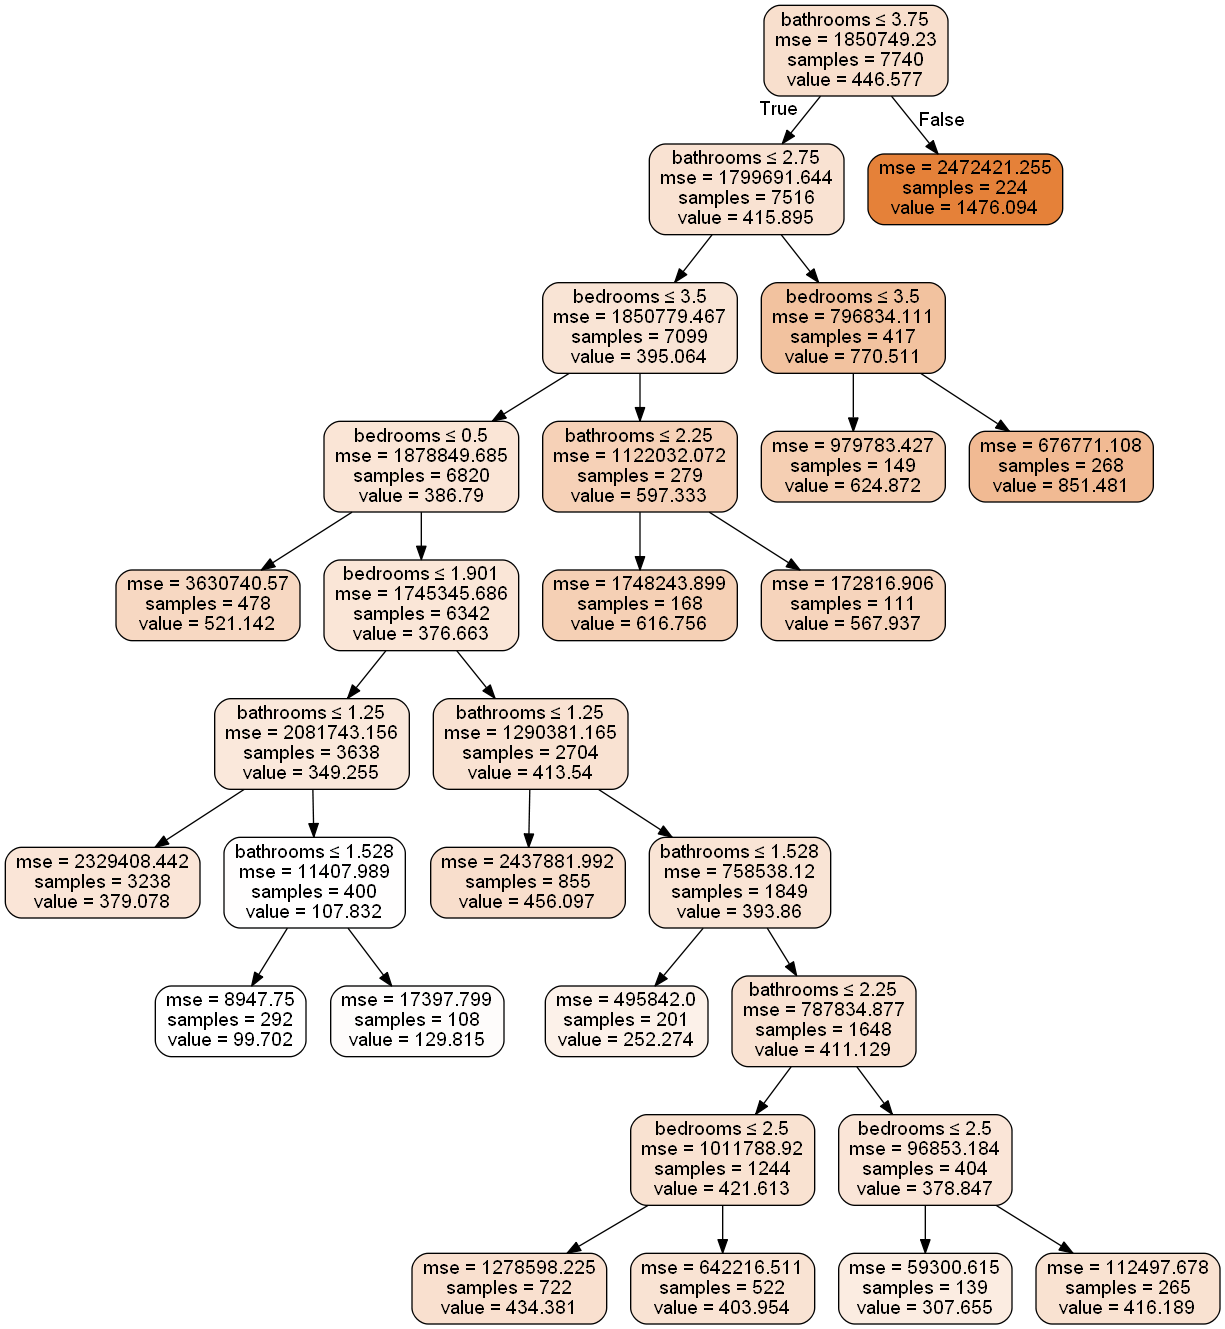

In [72]:
dot_data = StringIO()

tree.export_graphviz(tree_reg, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters = True,
                    feature_names = X_train.columns,
                    class_names = ['Bedrooms/Bathrooms', 'Price'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Changing from max_depth to min_samples_leaf definitely helped, but more features need to be added.

## Model 2: Decision Tree with more features

In [60]:
df.columns

Index(['id', 'neighborhood', 'zipcode', 'latitude', 'longitude',
       'property_type', 'room_type', 'bathrooms', 'bedrooms', 'price', 'Name',
       'Full_Address', 'lat', 'long', 'dist_lat', 'dist_long'],
      dtype='object')

In [61]:
X = df[['bathrooms', 'bedrooms', 'room_type', 'property_type', 'dist_lat', 'dist_long']]

y = df[['price']]

In [75]:
X = pd.get_dummies(X, columns = ['room_type', ])

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [77]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 6) (7740, 1)
(2581, 6) (2581, 1)


In [78]:
tree2 = DecisionTreeRegressor(min_samples_leaf=100)

In [79]:
tree2.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [80]:
print(tree2.score(X_train, y_train))

0.038214461637208874


In [93]:
from sklearn.metrics import mean_squared_error, r2_score

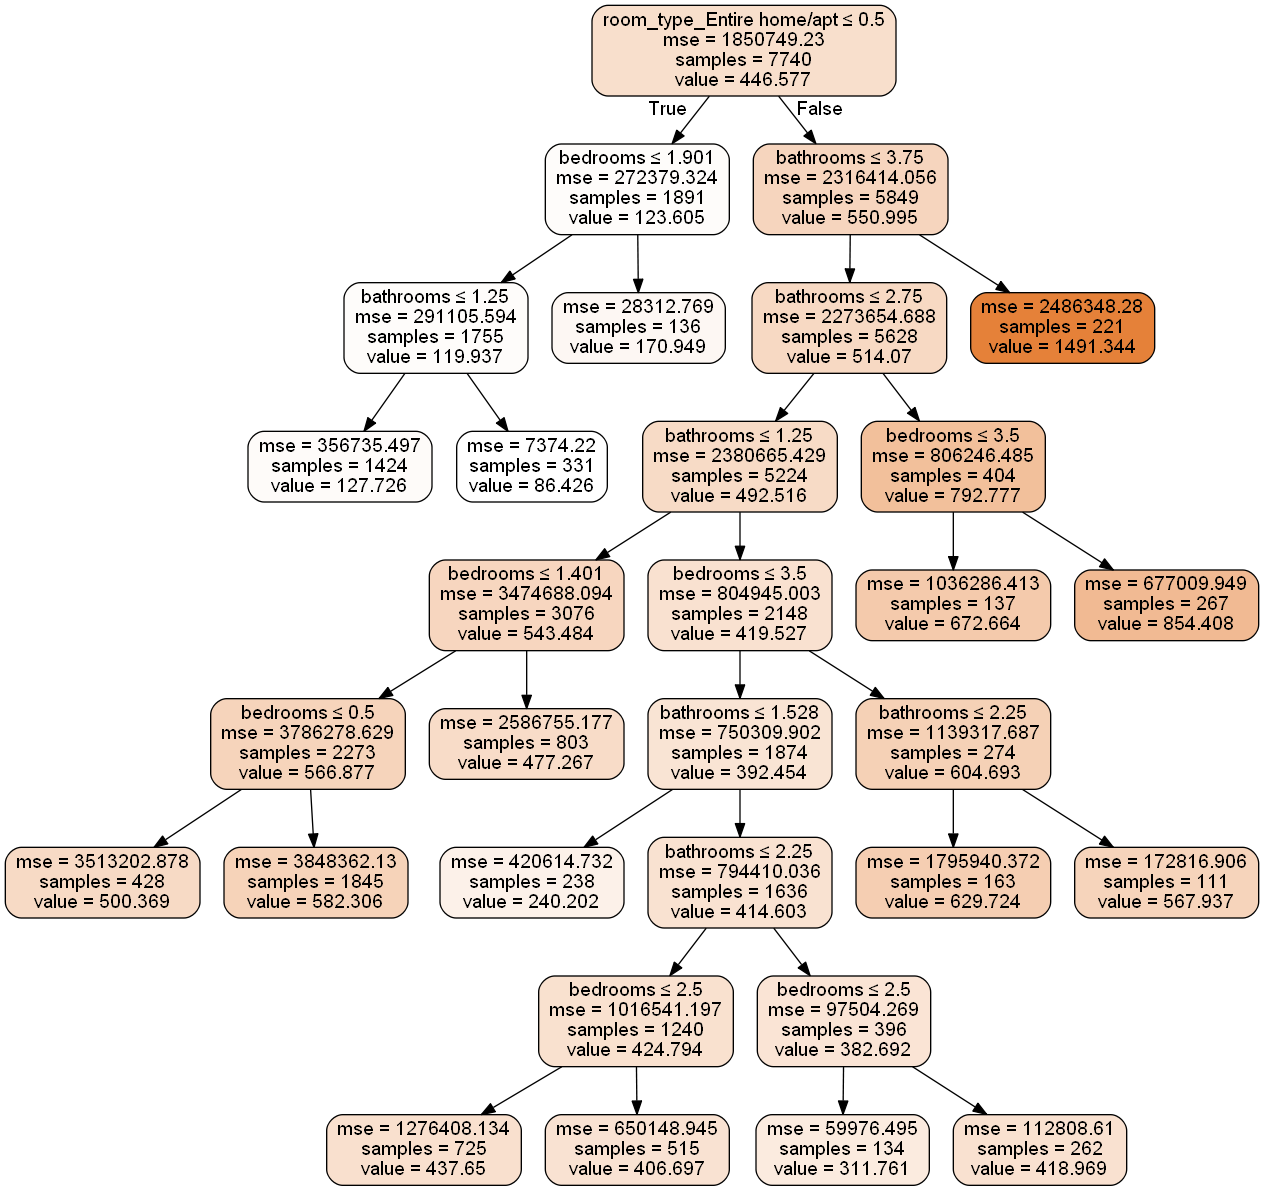

In [81]:
dot_data = StringIO()

tree.export_graphviz(tree2, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters = True,
                    feature_names = X_train.columns,
                    class_names = ['Bedrooms/Bathrooms', 'Price'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

## Model X: Random Forest Regression

In [83]:
from sklearn.ensemble import RandomForestRegressor

In [84]:
regr = RandomForestRegressor(min_samples_leaf = 100, random_state=0)

In [85]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 6) (7740, 1)
(2581, 6) (2581, 1)


In [86]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [88]:
print(regr.score(X_train, y_train))

0.03788305933696634


In [89]:
y_pred = regr.predict(X_test)

In [90]:
y_pred = pd.Series(y_pred)

Text(0.5, 1.0, 'Random Forest Regression, Test v. Prediction')

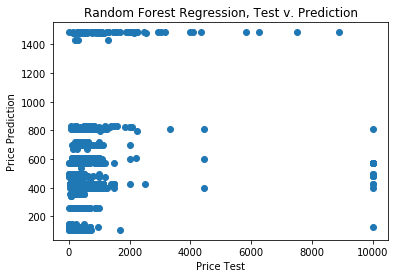

In [91]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price Test')
plt.ylabel('Price Prediction')
plt.title('Random Forest Regression, Test v. Prediction')

In [94]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
rmse

1161.852454354991

In [105]:
regr.feature_importances_

array([0.48992419, 0.08033179, 0.42974402, 0.        , 0.        ,
       0.        ])

Still getting a large RMSE, continue adding features.

## Model 4: Gradient Boosting Regression

In [95]:
df.columns

Index(['neighborhood', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'bathrooms', 'bedrooms', 'price'],
      dtype='object')

In [96]:
df.dtypes

neighborhood       object
zipcode             int64
latitude          float64
longitude         float64
property_type    category
room_type        category
bathrooms         float64
bedrooms          float64
price             float64
dtype: object

In [97]:
from sklearn.ensemble import GradientBoostingRegressor

In [98]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 6) (7740, 1)
(2581, 6) (2581, 1)


In [99]:
gbrt = GradientBoostingRegressor(min_samples_leaf=100, n_estimators=3, learning_rate=1.0)

In [100]:
gbrt.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=1.0, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=100, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=3,
                          n_iter_no_change=None, presort='deprecated',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)

In [101]:
print(gbrt.score(X_train, y_train))

0.03877829589566473


In [102]:
y_pred = gbrt.predict(X_test)

In [103]:
y_pred = pd.Series(y_pred)

Text(0.5, 1.0, 'Gradient Boosting Regression, Test v. Prediction')

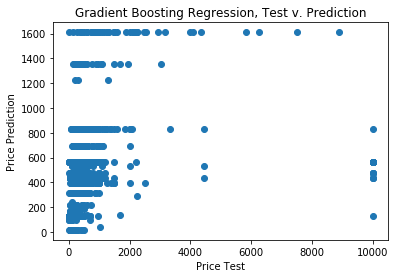

In [104]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price Test')
plt.ylabel('Price Prediction')
plt.title('Gradient Boosting Regression, Test v. Prediction')

---

## Gradient Boosting with Encoding for Zipcodes/Property_type?

One Hot Encoding? from sklearn.preprocessing import OneHotEncoder

Ordinal Encoding? from sklearn.preprocessing import OrdinalEncoder



---

Starting modeling over and encoding as many features as possible.

## Decision Tree with Encoding for Room_type, Property_Type, Zip

In [106]:
df.columns

Index(['neighborhood', 'zipcode', 'latitude', 'longitude', 'property_type',
       'room_type', 'bathrooms', 'bedrooms', 'price'],
      dtype='object')

In [108]:
X = df[['zipcode', 'property_type',
       'room_type', 'bathrooms', 'bedrooms']]

y = df[['price']]

In [110]:
# Fix this!!!!!

X = pd.get_dummies(X, columns=['zipcode', 'property_type', 'room_type',])

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=123)

In [113]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 120) (7740, 1)
(2581, 120) (2581, 1)


In [122]:
new_tree = DecisionTreeRegressor(min_samples_leaf=100)

In [123]:
new_tree.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=100, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [124]:
print(new_tree.score(X_train, y_train))

0.09300734793718801


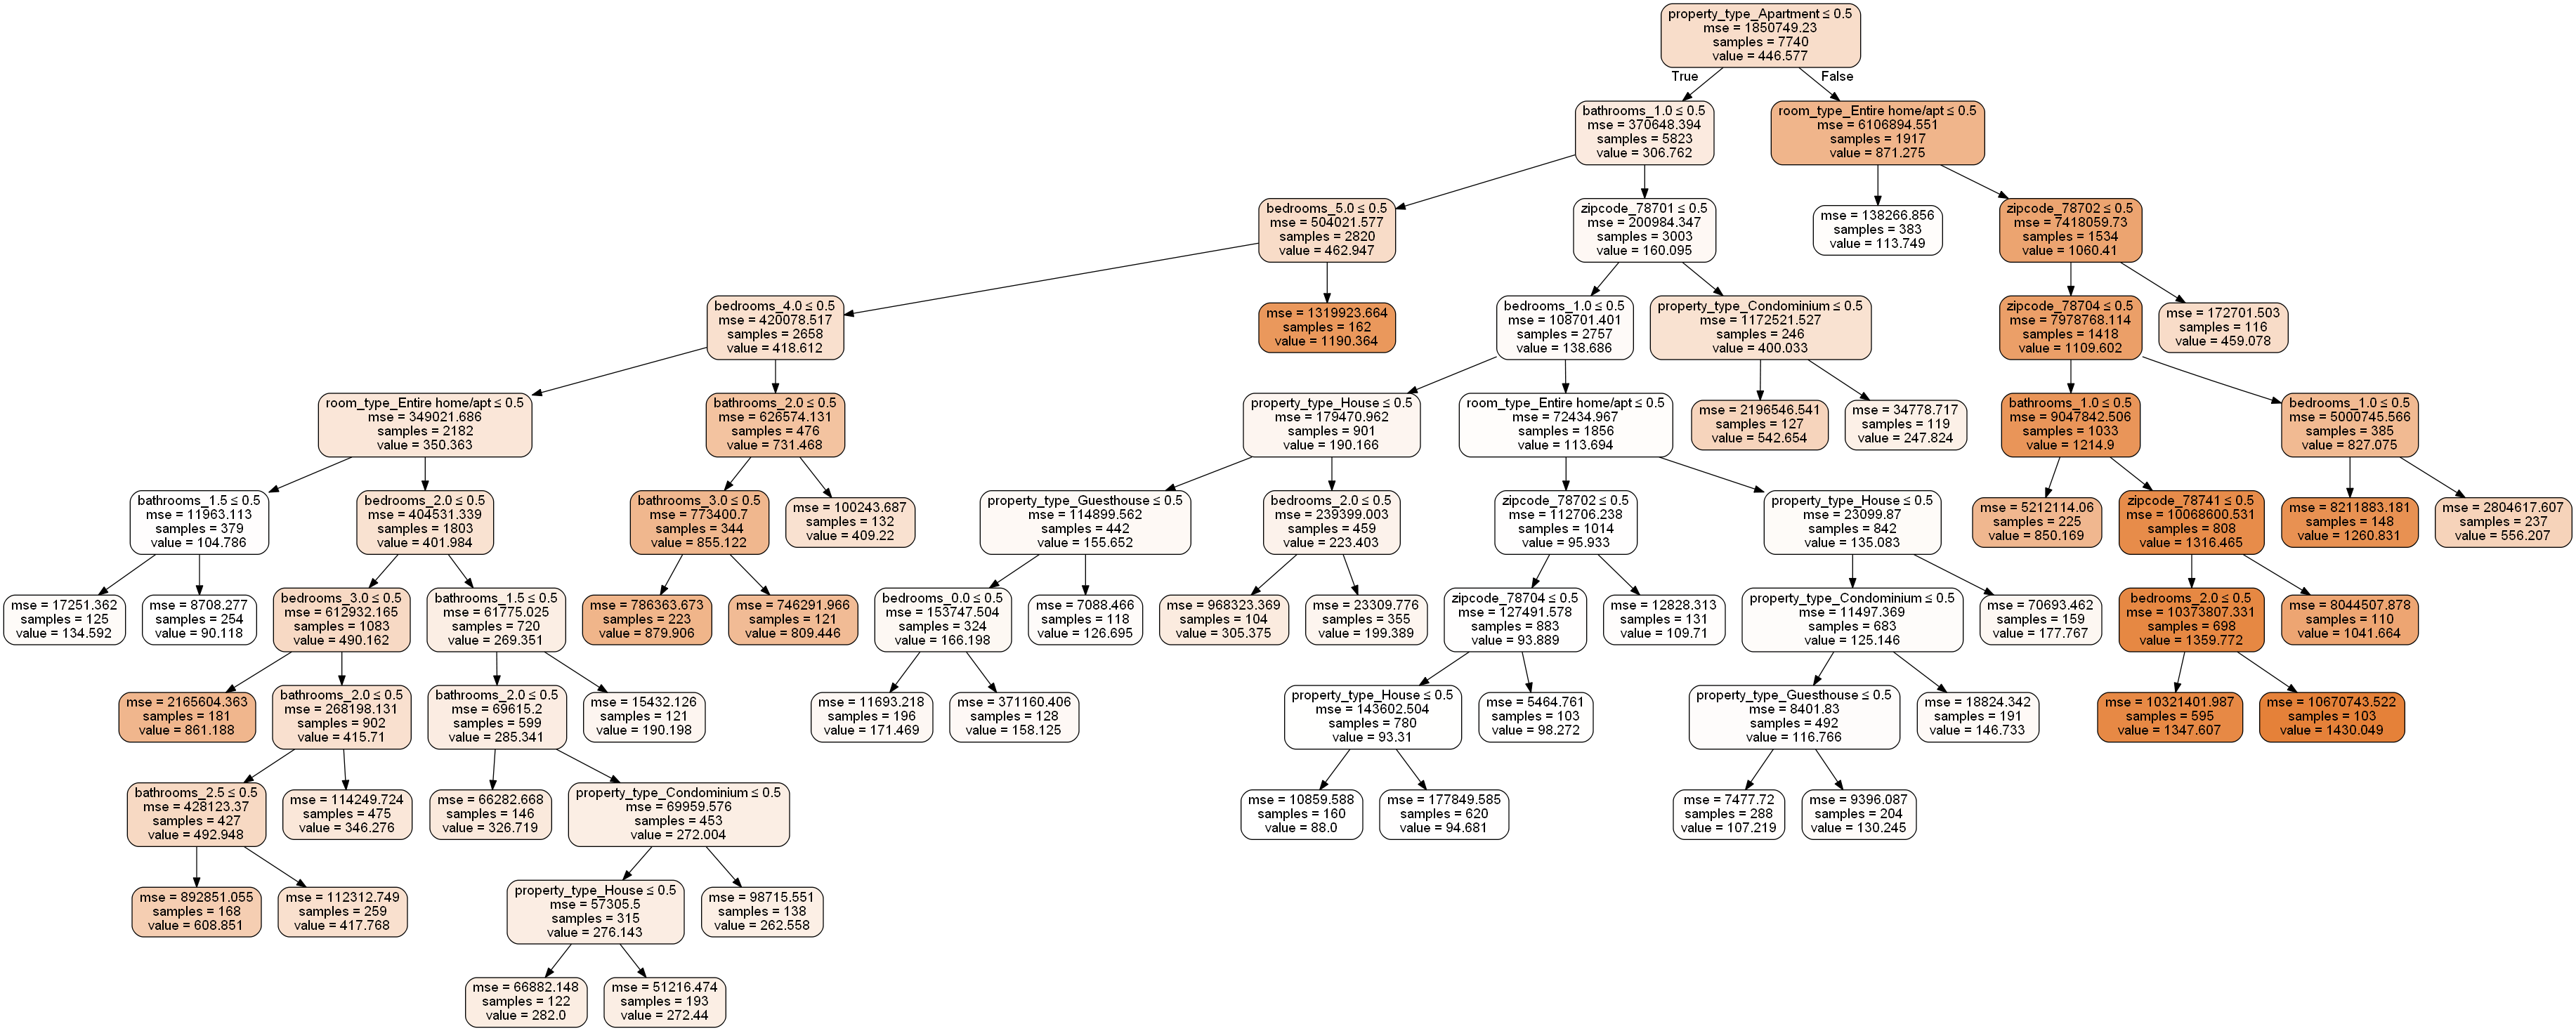

In [125]:
dot_data = StringIO()

tree.export_graphviz(new_tree, out_file=dot_data,
                    filled=True, rounded=True,
                    special_characters = True,
                    feature_names = X_train.columns,
                    class_names = ['Bedrooms/Bathrooms', 'Price'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

Getting better, now let's try a Random Forest Regression

## Random Forest 2

In [126]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 120) (7740, 1)
(2581, 120) (2581, 1)


In [127]:
regr = RandomForestRegressor(min_samples_leaf = 100, random_state=0)

In [128]:
regr.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=100,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [129]:
print(regr.score(X_train, y_train))

0.08970284621741831


In [135]:
feat_imp = regr.feature_importances_

In [130]:
y_pred = regr.predict(X_test)

In [131]:
y_pred = pd.Series(y_pred)

Text(0.5, 1.0, 'Random Forest Regression, Test v. Prediction')

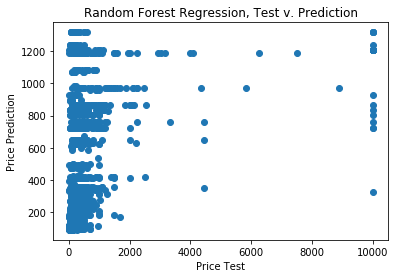

In [133]:
plt.scatter(y_test, y_pred)
plt.xlabel('Price Test')
plt.ylabel('Price Prediction')
plt.title('Random Forest Regression, Test v. Prediction')

In [136]:
feature_importances = dict(zip(X_train.columns, feat_imp))

In [137]:
for key, value in feature_importances.items():
    print(key, value)

zipcode_78701 0.009282201226879888
zipcode_78702 0.00015441051810001824
zipcode_78703 0.0
zipcode_78704 0.03735617896046775
zipcode_78705 0.0
zipcode_78712 0.0
zipcode_78717 0.0
zipcode_78719 0.0
zipcode_78721 0.0
zipcode_78722 0.0
zipcode_78723 0.0
zipcode_78724 0.0
zipcode_78725 0.0
zipcode_78726 0.0
zipcode_78727 0.0
zipcode_78728 0.0
zipcode_78729 0.0
zipcode_78730 0.0
zipcode_78731 0.0
zipcode_78732 0.0
zipcode_78733 0.0
zipcode_78734 0.0
zipcode_78735 0.0
zipcode_78736 0.0
zipcode_78737 0.0
zipcode_78738 0.0
zipcode_78739 0.0
zipcode_78741 0.0
zipcode_78742 0.0
zipcode_78744 0.0
zipcode_78745 0.0
zipcode_78746 0.0
zipcode_78747 0.0
zipcode_78748 0.0
zipcode_78749 0.0
zipcode_78750 0.0
zipcode_78751 0.0
zipcode_78752 0.0
zipcode_78753 0.0
zipcode_78754 0.0
zipcode_78756 0.0
zipcode_78757 0.0
zipcode_78758 0.0
zipcode_78759 0.0
property_type_Aparthotel 0.0
property_type_Apartment 0.35956373929033003
property_type_Barn 0.0
property_type_Bed and breakfast 0.0
property_type_Boat 0.0
p

In [138]:
feature_list = list(X_train.columns)

In [139]:
feature_importances = [(feature, round(importance, 2)) for feature, 
                       importance in zip(feature_list, feat_imp)]

In [140]:
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

In [141]:
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: property_type_Apartment Importance: 0.36
Variable: room_type_Entire home/apt Importance: 0.23
Variable: bathrooms_1.0        Importance: 0.09
Variable: bedrooms_5.0         Importance: 0.06
Variable: bedrooms_1.0         Importance: 0.05
Variable: zipcode_78704        Importance: 0.04
Variable: bathrooms_2.0        Importance: 0.03
Variable: bathrooms_2.5        Importance: 0.03
Variable: bedrooms_2.0         Importance: 0.03
Variable: bedrooms_4.0         Importance: 0.03
Variable: bathrooms_1.5        Importance: 0.02
Variable: zipcode_78701        Importance: 0.01
Variable: bathrooms_3.0        Importance: 0.01
Variable: bedrooms_0.0         Importance: 0.01
Variable: bedrooms_3.0         Importance: 0.01
Variable: zipcode_78702        Importance: 0.0
Variable: zipcode_78703        Importance: 0.0
Variable: zipcode_78705        Importance: 0.0
Variable: zipcode_78712        Importance: 0.0
Variable: zipcode_78717        Importance: 0.0
Variable: zipcode_78719        Import

## GridSearch CV for Random Forest

In [143]:
from sklearn.ensemble import RandomForestRegressor

In [145]:
from sklearn.model_selection import RandomizedSearchCV

In [147]:
# number of trees
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

# Num of features to consider at every split
max_features = ['auto', 'sqrt']

# Max number of levels in tree
max_depth = [int(x) for x in range(3, 21)]
max_depth.append(None)

# Min. num of samples required to split a node
min_samples_split = [2, 5, 10]

# Min num of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Method of selecting samples for trainging each tree
bootstrap = [True, False]

In [148]:
random_grid = {'n_estimators': n_estimators,
              'max_features': max_features,
              'max_depth': max_depth,
              'min_samples_split': min_samples_split,
              'min_samples_leaf': min_samples_leaf,
              'bootstrap': bootstrap}

In [150]:
from pprint import pprint

In [151]:
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10321 entries, 0 to 10320
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   neighborhood   9536 non-null   object  
 1   zipcode        10321 non-null  int64   
 2   latitude       10321 non-null  float64 
 3   longitude      10321 non-null  float64 
 4   property_type  10321 non-null  category
 5   room_type      10321 non-null  category
 6   bathrooms      10321 non-null  float64 
 7   bedrooms       10321 non-null  float64 
 8   price          10321 non-null  float64 
dtypes: category(2), float64(5), int64(1), object(1)
memory usage: 586.4+ KB


In [153]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(7740, 120) (7740, 1)
(2581, 120) (2581, 1)


In [154]:
rf = RandomForestRegressor()

In [155]:
rf_random = RandomizedSearchCV(estimator = rf,
                              param_distributions=random_grid,
                              n_iter = 100,
                              cv = 3,
                              verbose = 2,
                              random_state = 42,
                              n_jobs = -1)

In [156]:
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 97.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [157]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': True}

In [158]:
'''
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.8min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 97.0min finished
'''

'\n[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.\n[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  9.7min\n[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 43.8min\n[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 97.0min finished\n'

In [159]:
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    type(predictions)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance:')
    print('Average Error: {}'.format(np.mean(errors)))
    print('Accuracy = {}%'.format(accuracy))
    
    return accuracy

In [160]:
base_model = RandomForestRegressor(n_estimators = 10, random_state = 42)
base_model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=None, oob_score=False,
                      random_state=42, verbose=0, warm_start=False)

In [161]:
base_accuracy = evaluate(base_model, X_test, y_test)

ValueError: Unable to coerce to Series, length must be 1: given 2581

In [162]:
best_random = rf_random.best_estimator_
random_accuracy = evaluate(best_random, X_test, y_test)

ValueError: Unable to coerce to Series, length must be 1: given 2581

Need to work on evaluation metrics for these.

## Grid Search with Cross Validation

In [163]:
from sklearn.model_selection import GridSearchCV

In [165]:
random_grid

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000],
 'max_features': ['auto', 'sqrt'],
 'max_depth': [3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  None],
 'min_samples_split': [2, 5, 10],
 'min_samples_leaf': [1, 2, 4],
 'bootstrap': [True, False]}

In [166]:
rf_random.best_params_

{'n_estimators': 1800,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 16,
 'bootstrap': True}

In [170]:
param_grid = {'n_estimators': [1800],
             'min_samples_split': [10],
             'min_samples_leaf': [1],
             'max_features': ['sqrt'],
             'max_depth':[16],
             'bootstrap':[True]}

print(param_grid)

{'n_estimators': [1800], 'min_samples_split': [10], 'min_samples_leaf': [1], 'max_features': ['sqrt'], 'max_depth': [16], 'bootstrap': [True]}


In [171]:
rf = RandomForestRegressor()

In [172]:
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,
                          cv = 3, n_jobs = -1, verbose = 2)

In [173]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  1.4min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [174]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 16,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 10,
 'n_estimators': 1800}

In [175]:
best_grid = grid_search.best_estimator_

In [176]:
best_grid

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=16, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=1800, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [177]:
grid_accuracy = evaluate(best_grid, X_test, y_test)

ValueError: Unable to coerce to Series, length must be 1: given 2581